In [82]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, Lasso, LinearRegression
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import *
import matplotlib.pyplot as plt

In [84]:
pokemon_df = pd.read_csv('pokemon.csv')

In [3]:
# Remove the feature without variance from this list
number_cols = ['HP', 'Attack', 'Defense']

pokemon_df[number_cols].describe()

,HP,Attack,Defense
count,800.000000,800.000000,800.000000
mean,69.258750,79.001250,73.842500
std,25.534669,32.457366,31.183501
min,1.000000,5.000000,5.000000
25%,50.000000,55.000000,50.000000
50%,65.000000,75.000000,70.000000
75%,80.000000,100.000000,90.000000
max,255.000000,190.000000,230.000000


In [4]:
ansur_df_1 = pd.read_csv('ANSUR_II_MALE.csv')
ansur_df_2 = pd.read_csv('ANSUR_II_FEMALE.csv')

In [ ]:
ansur_df_2.head()

In [ ]:
# Create a pairplot and color the points using the 'Gender' feature
sns.pairplot(ansur_df_1, hue='Gender', diag_kind='hist')

# Show the plot
plt.show()

In [ ]:
# Remove one of the redundant features
reduced_df = ansur_df_1.drop('stature_m', axis=1)

# Create a pairplot and color the points using the 'Gender' feature
sns.pairplot(reduced_df, hue='Gender')

# Show the plot
plt.show()

In [ ]:
# Create a pairplot and color the points using the 'Gender' feature
sns.pairplot(ansur_df_2, hue='Gender', diag_kind='hist')


# Show the plot
plt.show()

In [ ]:
# Remove the redundant feature
reduced_df = ansur_df_2.drop('n_legs', axis=1)

# Create a pairplot and color the points using the 'Gender' feature
sns.pairplot(reduced_df, hue='Gender', diag_kind='hist')

# Show the plot
plt.show()

In [ ]:
# Non-numerical columns in the dataset
non_numeric = ['Branch', 'Gender', 'Component']

# Drop the non-numerical columns from df
df_numeric = df.drop(non_numeric, axis=1)

# Create a t-SNE model with learning rate 50
m = TSNE(learning_rate=50)

# Fit and transform the t-SNE model on the numeric dataset
tsne_features = m.fit_transform(df_numeric)
print(tsne_features.shape)

In [ ]:
# Color the points according to Army Component
sns.scatterplot(x="x", y="y", hue='Component', data=df)

# Show the plot
plt.show()

In [ ]:
# Color the points by Army Branch
sns.scatterplot(x="x", y="y", hue='Branch', data=df)

# Show the plot
plt.show()

In [ ]:
# Color the points by Gender
sns.scatterplot(x="x", y="y", hue='Gender', data=df)

# Show the plot
plt.show()

In [ ]:
ansur_df.corr()

In [5]:
ansur_df_1 = pd.read_csv('ANSUR_II_MALE.csv')
ansur_df_2 = pd.read_csv('ANSUR_II_FEMALE.csv')

In [8]:
ansur_df = pd.concat([ansur_df_1, ansur_df_2])

In [9]:
ansur_df.columns

Index(['Branch', 'Component', 'Gender', 'abdominalextensiondepthsitting',
       'acromialheight', 'acromionradialelength', 'anklecircumference',
       'axillaheight', 'balloffootcircumference', 'balloffootlength',
       'biacromialbreadth', 'bicepscircumferenceflexed', 'bicristalbreadth',
       'bideltoidbreadth', 'bimalleolarbreadth', 'bitragionchinarc',
       'bitragionsubmandibulararc', 'bizygomaticbreadth',
       'buttockcircumference', 'buttockdepth', 'buttockheight',
       'buttockkneelength', 'buttockpopliteallength', 'calfcircumference',
       'cervicaleheight', 'chestbreadth', 'chestcircumference', 'chestdepth',
       'chestheight', 'crotchheight', 'crotchlengthomphalion',
       'crotchlengthposterioromphalion', 'earbreadth', 'earlength',
       'earprotrusion', 'elbowrestheight', 'eyeheightsitting',
       'footbreadthhorizontal', 'footlength', 'forearmcenterofgriplength',
       'forearmcircumferenceflexed', 'forearmforearmbreadth',
       'forearmhandlength', 'fun

In [19]:
X = ansur_df.select_dtypes(exclude=object).reset_index(drop=True)
y = ansur_df.Gender

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size=0.2, random_state=42)

In [25]:
scaler = StandardScaler()
lr = LogisticRegression()

In [28]:
# Fit the scaler on the training features and transform these in one go
X_train_std = scaler.fit_transform(X_train)

# Fit the logistic regression model on the scaled training data
lr.fit(X_train_std, y_train)

# Scale the test features
X_test_std = scaler.transform(X_test)

# Predict diabetes presence on the scaled test set
y_pred = lr.predict(X_test_std)

# Prints accuracy metrics and feature coefficients
print("{0:.1%} accuracy on test set.".format(accuracy_score(y_test, y_pred))) 
print(dict(zip(X.columns, abs(lr.coef_[0]).round(2))))

100.0% accuracy on test set.
{'abdominalextensiondepthsitting': 0.07, 'acromialheight': 0.11, 'acromionradialelength': 0.2, 'anklecircumference': 0.31, 'axillaheight': 0.06, 'balloffootcircumference': 0.15, 'balloffootlength': 0.24, 'biacromialbreadth': 0.69, 'bicepscircumferenceflexed': 0.62, 'bicristalbreadth': 0.7, 'bideltoidbreadth': 0.35, 'bimalleolarbreadth': 0.31, 'bitragionchinarc': 0.18, 'bitragionsubmandibulararc': 0.11, 'bizygomaticbreadth': 0.23, 'buttockcircumference': 0.68, 'buttockdepth': 0.34, 'buttockheight': 0.35, 'buttockkneelength': 0.34, 'buttockpopliteallength': 0.19, 'calfcircumference': 0.3, 'cervicaleheight': 0.3, 'chestbreadth': 0.63, 'chestcircumference': 0.32, 'chestdepth': 1.23, 'chestheight': 1.04, 'crotchheight': 0.28, 'crotchlengthomphalion': 0.84, 'crotchlengthposterioromphalion': 0.25, 'earbreadth': 0.32, 'earlength': 0.1, 'earprotrusion': 0.58, 'elbowrestheight': 0.12, 'eyeheightsitting': 0.24, 'footbreadthhorizontal': 0.26, 'footlength': 0.2, 'forear

C:\Users\dyada\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [33]:
diabetes_df = pd.read_csv('diabetes.csv')

In [34]:
# Remove the feature with the lowest model coefficient
X = diabetes_df[['pregnant', 'glucose', 'bloodpressure', 'insulin', 'bmi', 'age']]
y = diabetes_df.outcome

# Performs a 25-75% train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Scales features and fits the logistic regression model
lr.fit(scaler.fit_transform(X_train), y_train)

# Calculates the accuracy on the test set and prints coefficients
acc = accuracy_score(y_test, lr.predict(scaler.transform(X_test)))
print("{0:.1%} accuracy on test set.".format(acc)) 
print(dict(zip(X.columns, abs(lr.coef_[0]).round(2))))

80.2% accuracy on test set.
{'pregnant': 0.28, 'glucose': 1.01, 'bloodpressure': 0.19, 'insulin': 0.04, 'bmi': 0.74, 'age': 0.27}


C:\Users\dyada\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [36]:
# Remove the feature with the lowest model coefficient
X = diabetes_df[['pregnant', 'glucose', 'bloodpressure', 'bmi', 'age']]
y = diabetes_df.outcome

# Performs a 25-75% train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Scales features and fits the logistic regression model
lr.fit(scaler.fit_transform(X_train), y_train)

# Calculates the accuracy on the test set and prints coefficients
acc = accuracy_score(y_test, lr.predict(scaler.transform(X_test)))
print("{0:.1%} accuracy on test set.".format(acc)) 
print(dict(zip(X.columns, abs(lr.coef_[0]).round(2))))

80.2% accuracy on test set.
{'pregnant': 0.28, 'glucose': 0.99, 'bloodpressure': 0.19, 'bmi': 0.74, 'age': 0.27}


C:\Users\dyada\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [37]:
# Only keep the feature with the highest coefficient
X = diabetes_df[['glucose']]

# Performs a 25-75% train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Scales features and fits the logistic regression model to the data
lr.fit(scaler.fit_transform(X_train), y_train)

# Calculates the accuracy on the test set and prints coefficients
acc = accuracy_score(y_test, lr.predict(scaler.transform(X_test)))
print("{0:.1%} accuracy on test set.".format(acc)) 
print(dict(zip(X.columns, abs(lr.coef_[0]).round(2))))

76.6% accuracy on test set.
{'glucose': 1.16}


C:\Users\dyada\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [40]:
# Remove the feature with the lowest model coefficient
X = diabetes_df[['pregnant', 'glucose', 'bloodpressure', 'bmi', 'age']]
y = diabetes_df.outcome

# Performs a 25-75% train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [41]:
# Create the RFE with a LogisticRegression estimator and 3 features to select
rfe = RFE(estimator=LogisticRegression(), n_features_to_select=3, verbose=1)

# Fits the eliminator to the data
rfe.fit(X_train, y_train)

# Print the features and their ranking (high = dropped early on)
print(dict(zip(X.columns, rfe.ranking_)))

# Print the features that are not eliminated
print(X.columns[rfe.support_])

# Calculates the test set accuracy
acc = accuracy_score(y_test, rfe.predict(X_test))
print("{0:.1%} accuracy on test set.".format(acc)) 

Fitting estimator with 5 features.
Fitting estimator with 4 features.
{'pregnant': 1, 'glucose': 1, 'bloodpressure': 2, 'bmi': 1, 'age': 3}
Index(['pregnant', 'glucose', 'bmi'], dtype='object')
78.1% accuracy on test set.


C:\Users\dyada\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dyada\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dyada\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [44]:
# Perform a 75% training and 25% test data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Fit the random forest model to the training data
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)

# Calculate the accuracy
acc = accuracy_score(y_test,rf.predict(X_test))

# Print the importances per feature
print(dict(zip(X.columns, rf.feature_importances_.round(2))))

# Print accuracy
print("{0:.1%} accuracy on test set.".format(acc))

{'pregnant': 0.11, 'glucose': 0.34, 'bloodpressure': 0.12, 'bmi': 0.24, 'age': 0.19}
76.6% accuracy on test set.


C:\Users\dyada\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [45]:
# Create a mask for features importances above the threshold
mask = rf.feature_importances_ > 0.15

# Prints out the mask
print(mask)

[False  True False  True  True]


In [46]:
# Create a mask for features importances above the threshold
mask = rf.feature_importances_ > 0.15

# Apply the mask to the feature dataset X
reduced_X = X.loc[:, mask]

# prints out the selected column names
print(reduced_X.columns)

Index(['glucose', 'bmi', 'age'], dtype='object')


In [47]:
# Set the feature eliminator to remove 2 features on each step
rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=2, step=2, verbose=1)

# Fit the model to the training data
rfe.fit(X_train, y_train)

# Create a mask
mask = rfe.support_

# Apply the mask to the feature dataset X and print the result
reduced_X = X.loc[:, mask]
print(reduced_X.columns)

Fitting estimator with 5 features.
Fitting estimator with 3 features.
Index(['glucose', 'bmi'], dtype='object')


C:\Users\dyada\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\dyada\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\dyada\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [55]:
X = ansur_df.select_dtypes(exclude=object).reset_index(drop=True)
y = ansur_df.Gender

In [56]:
y

0         Male
1         Male
2         Male
3         Male
4         Male
         ...  
1981    Female
1982    Female
1983    Female
1984    Female
1985    Female
Name: Gender, Length: 6068, dtype: object

In [58]:
X = ansur_df.select_dtypes(exclude=object).reset_index(drop=True)
y = ansur_df.Gender
y = pd.get_dummies(y).iloc[:, 1]
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size=0.2, random_state=42)

In [59]:
# Fit the scaler on the training features and transform these in one go
X_train_std = scaler.fit_transform(X_train)

# Create the Lasso model
la = Lasso()

# Fit it to the standardized training data
la.fit(X_train_std, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [60]:
# Transform the test set with the pre-fitted scaler
X_test_std = scaler.transform(X_test)

# Calculate the coefficient of determination (R squared) on X_test_std
r_squared = la.score(X_test_std, y_test)
print("The model can predict {0:.1%} of the variance in the test set.".format(r_squared))

# Create a list that has True values when coefficients equal 0
zero_coef = la.coef_ == 0

# Calculate how many features have a zero coefficient
n_ignored = sum(zero_coef)
print("The model has ignored {} out of {} features.".format(n_ignored, len(la.coef_)))

The model can predict -0.0% of the variance in the test set.
The model has ignored 94 out of 94 features.


In [61]:
from sklearn.linear_model import LassoCV

# Create and fit the LassoCV model on the training set
lcv = LassoCV()
lcv.fit(X_train, y_train)
print('Optimal alpha = {0:.3f}'.format(lcv.alpha_))

# Calculate R squared on the test set
r_squared = lcv.score(X_test, y_test)
print('The model explains {0:.1%} of the test set variance'.format(r_squared))

# Create a mask for coefficients not equal to zero
lcv_mask = lcv.coef_ != 0
print('{} features out of {} selected'.format(sum(lcv_mask), len(lcv_mask)))

C:\Users\dyada\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Optimal alpha = 0.034
The model explains 93.4% of the test set variance
64 features out of 94 selected


C:\Users\dyada\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11.370231269183115, tolerance: 0.10688267408323016
  positive)


In [62]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import GradientBoostingRegressor

# Select 10 features with RFE on a GradientBoostingRegressor, drop 3 features on each step
rfe_gb = RFE(estimator=GradientBoostingRegressor(), 
             n_features_to_select=10, step=3, verbose=1)
rfe_gb.fit(X_train, y_train)

Fitting estimator with 94 features.
Fitting estimator with 91 features.
Fitting estimator with 88 features.
Fitting estimator with 85 features.
Fitting estimator with 82 features.
Fitting estimator with 79 features.
Fitting estimator with 76 features.
Fitting estimator with 73 features.
Fitting estimator with 70 features.
Fitting estimator with 67 features.
Fitting estimator with 64 features.
Fitting estimator with 61 features.
Fitting estimator with 58 features.
Fitting estimator with 55 features.
Fitting estimator with 52 features.
Fitting estimator with 49 features.
Fitting estimator with 46 features.
Fitting estimator with 43 features.
Fitting estimator with 40 features.
Fitting estimator with 37 features.
Fitting estimator with 34 features.
Fitting estimator with 31 features.
Fitting estimator with 28 features.
Fitting estimator with 25 features.
Fitting estimator with 22 features.
Fitting estimator with 19 features.
Fitting estimator with 16 features.
Fitting estimator with 13 fe

RFE(estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse',
                                        init=None, learning_rate=0.1, loss='ls',
                                        max_depth=3, max_features=None,
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=100, n_iter_no_change=None,
                                        presort='auto', random_state=None,
                                        subsample=1.0, tol=0.0001,
                                        validation_fraction=0.1, verbose=0,
                                        warm_start=False),
    n_features_to_select=10, step=3, verbose=1)

In [63]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import GradientBoostingRegressor

# Select 10 features with RFE on a GradientBoostingRegressor, drop 3 features on each step
rfe_gb = RFE(estimator=GradientBoostingRegressor(), 
             n_features_to_select=10, step=3, verbose=1)
rfe_gb.fit(X_train, y_train)

# Calculate the R squared on the test set
r_squared = rfe_gb.score(X_test, y_test)
print('The model can explain {0:.1%} of the variance in the test set'.format(r_squared))

Fitting estimator with 94 features.
Fitting estimator with 91 features.
Fitting estimator with 88 features.
Fitting estimator with 85 features.
Fitting estimator with 82 features.
Fitting estimator with 79 features.
Fitting estimator with 76 features.
Fitting estimator with 73 features.
Fitting estimator with 70 features.
Fitting estimator with 67 features.
Fitting estimator with 64 features.
Fitting estimator with 61 features.
Fitting estimator with 58 features.
Fitting estimator with 55 features.
Fitting estimator with 52 features.
Fitting estimator with 49 features.
Fitting estimator with 46 features.
Fitting estimator with 43 features.
Fitting estimator with 40 features.
Fitting estimator with 37 features.
Fitting estimator with 34 features.
Fitting estimator with 31 features.
Fitting estimator with 28 features.
Fitting estimator with 25 features.
Fitting estimator with 22 features.
Fitting estimator with 19 features.
Fitting estimator with 16 features.
Fitting estimator with 13 fe

In [64]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import GradientBoostingRegressor

# Select 10 features with RFE on a GradientBoostingRegressor, drop 3 features on each step
rfe_gb = RFE(estimator=GradientBoostingRegressor(), 
             n_features_to_select=10, step=3, verbose=1)
rfe_gb.fit(X_train, y_train)

# Calculate the R squared on the test set
r_squared = rfe_gb.score(X_test, y_test)
print('The model can explain {0:.1%} of the variance in the test set'.format(r_squared))

# Assign the support array to gb_mask
gb_mask = rfe_gb.support_

Fitting estimator with 94 features.
Fitting estimator with 91 features.
Fitting estimator with 88 features.
Fitting estimator with 85 features.
Fitting estimator with 82 features.
Fitting estimator with 79 features.
Fitting estimator with 76 features.
Fitting estimator with 73 features.
Fitting estimator with 70 features.
Fitting estimator with 67 features.
Fitting estimator with 64 features.
Fitting estimator with 61 features.
Fitting estimator with 58 features.
Fitting estimator with 55 features.
Fitting estimator with 52 features.
Fitting estimator with 49 features.
Fitting estimator with 46 features.
Fitting estimator with 43 features.
Fitting estimator with 40 features.
Fitting estimator with 37 features.
Fitting estimator with 34 features.
Fitting estimator with 31 features.
Fitting estimator with 28 features.
Fitting estimator with 25 features.
Fitting estimator with 22 features.
Fitting estimator with 19 features.
Fitting estimator with 16 features.
Fitting estimator with 13 fe

In [65]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

# Select 10 features with RFE on a RandomForestRegressor, drop 3 features on each step
rfe_rf = RFE(estimator=RandomForestRegressor(), 
             n_features_to_select=10, step=3, verbose=1)
rfe_rf.fit(X_train, y_train)

# Calculate the R squared on the test set
r_squared = rfe_rf.score(X_test, y_test)
print('The model can explain {0:.1%} of the variance in the test set'.format(r_squared))

# Assign the support array to gb_mask
rf_mask = rfe_rf.support_

Fitting estimator with 94 features.


C:\Users\dyada\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Fitting estimator with 91 features.


C:\Users\dyada\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Fitting estimator with 88 features.


C:\Users\dyada\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Fitting estimator with 85 features.


C:\Users\dyada\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Fitting estimator with 82 features.


C:\Users\dyada\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Fitting estimator with 79 features.


C:\Users\dyada\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Fitting estimator with 76 features.


C:\Users\dyada\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Fitting estimator with 73 features.


C:\Users\dyada\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Fitting estimator with 70 features.


C:\Users\dyada\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Fitting estimator with 67 features.


C:\Users\dyada\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Fitting estimator with 64 features.


C:\Users\dyada\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Fitting estimator with 61 features.


C:\Users\dyada\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Fitting estimator with 58 features.


C:\Users\dyada\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Fitting estimator with 55 features.


C:\Users\dyada\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Fitting estimator with 52 features.


C:\Users\dyada\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Fitting estimator with 49 features.


C:\Users\dyada\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Fitting estimator with 46 features.


C:\Users\dyada\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Fitting estimator with 43 features.


C:\Users\dyada\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Fitting estimator with 40 features.


C:\Users\dyada\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Fitting estimator with 37 features.


C:\Users\dyada\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Fitting estimator with 34 features.


C:\Users\dyada\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Fitting estimator with 31 features.


C:\Users\dyada\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Fitting estimator with 28 features.


C:\Users\dyada\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Fitting estimator with 25 features.


C:\Users\dyada\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Fitting estimator with 22 features.


C:\Users\dyada\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Fitting estimator with 19 features.


C:\Users\dyada\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Fitting estimator with 16 features.
Fitting estimator with 13 features.


C:\Users\dyada\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


The model can explain 95.6% of the variance in the test set


C:\Users\dyada\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\dyada\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [68]:
# Sum the votes of the three models
votes = np.sum([lcv_mask, rf_mask, gb_mask], axis=0)
print(votes)

[0 0 0 1 1 0 1 3 1 3 1 0 1 0 0 3 1 1 1 0 1 1 1 1 3 3 0 2 1 1 0 1 0 1 0 1 0
 1 1 0 1 0 2 1 1 1 1 1 0 2 3 0 0 1 1 1 0 1 3 0 1 3 1 1 0 1 1 2 0 0 1 1 1 1
 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 0 1 0 0 0]


In [74]:
lm = LinearRegression()

In [75]:
# Sum the votes of the three models
votes = np.sum([lcv_mask, rf_mask, gb_mask], axis=0)

# Create a mask for features selected by all 3 models
meta_mask = votes >= 3

# Apply the dimensionality reduction on X
X_reduced = X.loc[:, meta_mask]

# Plug the reduced dataset into a linear regression pipeline
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.3, random_state=0)
lm.fit(scaler.fit_transform(X_train), y_train)
r_squared = lm.score(scaler.transform(X_test), y_test)
print('The model can explain {0:.1%} of the variance in the test set using {1:} features.'.format(r_squared, len(lm.coef_)))

The model can explain 84.9% of the variance in the test set using 8 features.


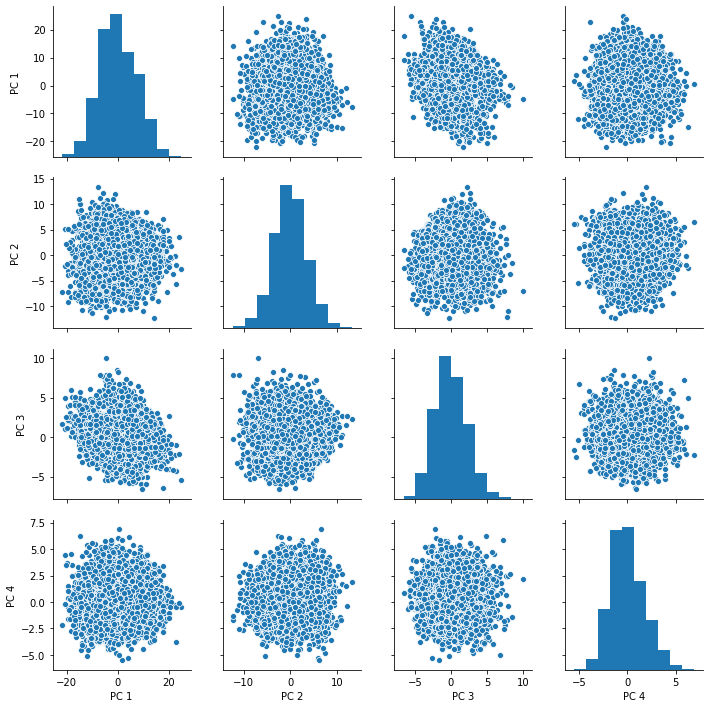

In [80]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Create the scaler
scaler = StandardScaler()
ansur_std = scaler.fit_transform(ansur_df.select_dtypes(exclude=object).reset_index(drop=True))

# Create the PCA instance and fit and transform the data with pca
pca = PCA(n_components=4)
pc = pca.fit_transform(ansur_std)
pc_df = pd.DataFrame(pc, columns=['PC 1', 'PC 2', 'PC 3', 'PC 4'])

# Create a pairplot of the principal component dataframe
sns.pairplot(pc_df)
plt.show()

In [87]:
# Build the pipeline
pipe = Pipeline([('scaler', StandardScaler()),
        		 ('reducer', PCA(n_components=2))])

# Fit it to the dataset and extract the component vectors
pipe.fit(pokemon_df.select_dtypes(exclude=object).reset_index(drop=True))
vectors = pipe.steps[1][1].components_.round(2)

# Print feature effects
print('PC 1 effects = ' + str(dict(zip(pokemon_df.select_dtypes(exclude=object).reset_index(drop=True).columns, vectors[0]))))
print('PC 2 effects = ' + str(dict(zip(pokemon_df.select_dtypes(exclude=object).reset_index(drop=True).columns, vectors[1]))))

PC 1 effects = {'#': 0.11, 'Total': 0.49, 'HP': 0.31, 'Attack': 0.36, 'Defense': 0.29, 'Sp. Atk': 0.37, 'Sp. Def': 0.36, 'Speed': 0.28, 'Generation': 0.07, 'Legendary': 0.31}
PC 2 effects = {'#': -0.69, 'Total': 0.07, 'HP': 0.02, 'Attack': 0.04, 'Defense': 0.01, 'Sp. Atk': 0.07, 'Sp. Def': 0.05, 'Speed': 0.11, 'Generation': -0.7, 'Legendary': -0.02}


In [88]:
# Build the pipeline
pipe = Pipeline([('scaler', StandardScaler()),
                 ('reducer', PCA(n_components=2))])

# Fit the pipeline to poke_df and transform the data
pc = pipe.fit_transform(pokemon_df.select_dtypes(exclude=object).reset_index(drop=True))

print(pc)

[[-2.11521623  1.93983982]
 [-0.79863941  2.13805386]
 [ 1.01458344  2.40952015]
 ...
 [ 3.9948597  -1.96543979]
 [ 5.1929164  -1.77730478]
 [ 3.81172629 -2.06654307]]


In [93]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('reducer', PCA(n_components=2))])

# Fit the pipeline to poke_df and transform the data
pc = pipe.fit_transform(pokemon_df.select_dtypes(exclude=object).reset_index(drop=True))

# Add the 2 components to poke_cat_df
pokemon_df['PC 1'] = pc[:, 0]
pokemon_df['PC 2'] = pc[:, 1]

print(pokemon_df.head())

   #                   Name Type 1  Type 2  Total  HP  Attack  Defense  \
0  1              Bulbasaur  Grass  Poison    318  45      49       49   
1  2                Ivysaur  Grass  Poison    405  60      62       63   
2  3               Venusaur  Grass  Poison    525  80      82       83   
3  3  VenusaurMega Venusaur  Grass  Poison    625  80     100      123   
4  4             Charmander   Fire     NaN    309  39      52       43   

   Sp. Atk  Sp. Def  Speed  Generation  Legendary      PC 1      PC 2  
0       65       65     45           1      False -2.361516  2.383823  
1       80       80     60           1      False -0.891634  2.627403  
2      100      100     80           1      False  1.132723  2.961002  
3      122      120     80           1      False  2.793095  3.183011  
4       60       50     65           1      False -2.574111  2.409273  


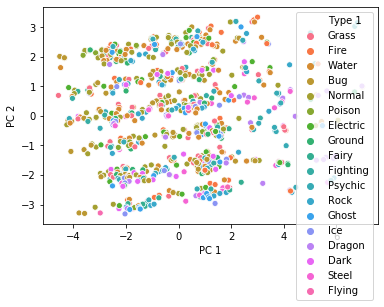

In [98]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('reducer', PCA(n_components=2))])

# Fit the pipeline to poke_df and transform the data
pc = pipe.fit_transform(pokemon_df.select_dtypes(exclude=object).reset_index(drop=True))

# Add the 2 components to poke_cat_df
pokemon_df['PC 1'] = pc[:, 0]
pokemon_df['PC 2'] = pc[:, 1]

# Use the Type feature to color the PC 1 vs PC 2 scatterplot
sns.scatterplot(data=pokemon_df, 
                x='PC 1', y='PC 2', hue='Type 1')
plt.show()

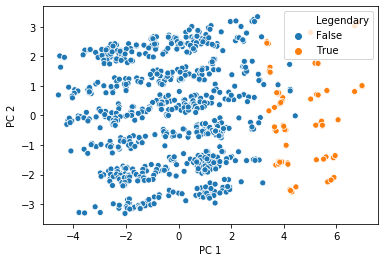

In [99]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('reducer', PCA(n_components=2))])

# Fit the pipeline to poke_df and transform the data
pc = pipe.fit_transform(pokemon_df.select_dtypes(exclude=object).reset_index(drop=True))

# Add the 2 components to poke_cat_df
pokemon_df['PC 1'] = pc[:, 0]
pokemon_df['PC 2'] = pc[:, 1]

# Use the Legendary feature to color the PC 1 vs PC 2 scatterplot
sns.scatterplot(data=pokemon_df, 
                x='PC 1', y='PC 2', hue='Legendary')
plt.show()

In [100]:
# Build the pipeline
pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('reducer', PCA(n_components=3)),
        ('classifier', RandomForestClassifier(random_state=0))])

# Fit the pipeline to the training data
pipe.fit(X_train, y_train)

# Score the accuracy on the test set
accuracy = pipe.score(X_test, y_test)

# Prints the explained variance ratio and accuracy
print(pipe.steps[1][1].explained_variance_ratio_)
print('{0:.1%} test set accuracy'.format(accuracy))

[0.50482997 0.27949236 0.06851162]
98.8% test set accuracy


C:\Users\dyada\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
